# Appliances Energy Consumption Prediction - Regression Analysis

## Project Overview
This notebook implements multiple regression models to predict appliances energy consumption in a low-energy house based on environmental sensors data (temperature, humidity) and weather conditions.

## Motivation

### Why Energy Consumption Prediction Matters?

Energy consumption prediction is crucial in today's world for several important reasons:

**1. Smart Home Optimization**
- Enable intelligent home automation systems to optimize energy usage
- Automatically adjust heating, cooling, and appliance operation
- Reduce unnecessary energy waste through predictive control

**2. Cost Savings for Households**
- Help homeowners understand and reduce their electricity bills
- Identify high-consumption periods and patterns
- Make informed decisions about appliance usage

**3. Grid Management and Sustainability**
- Improve electrical grid load forecasting
- Balance energy supply and demand more efficiently
- Support renewable energy integration

**4. Environmental Impact**
- Reduce carbon footprint by minimizing energy waste
- Contribute to climate change mitigation efforts
- Promote sustainable living practices

### Problem Definition

**Objective:** Predict appliances energy consumption (in Wh) in a low-energy house

**Input Features:**
- **Environmental Sensors:** Temperature and humidity readings from various rooms
- **Weather Data:** External temperature, humidity, wind speed, visibility, pressure
- **Temporal Information:** Date and time patterns

**Target Variable:**
- Appliances energy consumption (Wh)

**Why This Matters:**
This analysis helps understand how environmental conditions affect energy consumption patterns, enabling:
- Better home energy management
- Data-driven decisions for energy efficiency improvements
- Predictive maintenance and optimization strategies
- Insights for smart building design

By accurately predicting energy consumption, we can create more sustainable and cost-effective living environments while reducing environmental impact.

---

## Dataset Description

**Dataset Name:** Appliances Energy Prediction Dataset

**Source:** UCI Machine Learning Repository

**Time Period:** January 11, 2016 to May 27, 2016 (4.5 months)

**Number of Samples:** 19,735 instances (10-minute intervals)

**Number of Features:** 28 variables (26 features + 1 target + 1 timestamp)

### Feature Details:

| Variable Name | Role | Type | Description | Units | Missing Values |
|---------------|------|------|-------------|-------|----------------|
| date | Identifier | Datetime | Timestamp of measurement | yyyy-mm-dd hh:mm:ss | No |
| **Appliances** | **Target** | **Continuous** | **Energy consumption of appliances** | **Wh** | **No** |
| lights | Feature | Continuous | Energy consumption of lights | Wh | No |
| T1 | Feature | Continuous | Temperature in kitchen | °C | No |
| RH_1 | Feature | Continuous | Humidity in kitchen | % | No |
| T2 | Feature | Continuous | Temperature in living room | °C | No |
| RH_2 | Feature | Continuous | Humidity in living room | % | No |
| T3 | Feature | Continuous | Temperature in laundry room | °C | No |
| RH_3 | Feature | Continuous | Humidity in laundry room | % | No |
| T4 | Feature | Continuous | Temperature in office room | °C | No |
| RH_4 | Feature | Continuous | Humidity in office room | % | No |
| T5 | Feature | Continuous | Temperature in bathroom | °C | No |
| RH_5 | Feature | Continuous | Humidity in bathroom | % | No |
| T6 | Feature | Continuous | Temperature outside (north side) | °C | No |
| RH_6 | Feature | Continuous | Humidity outside (north side) | % | No |
| T7 | Feature | Continuous | Temperature in ironing room | °C | No |
| RH_7 | Feature | Continuous | Humidity in ironing room | % | No |
| T8 | Feature | Continuous | Temperature in teenager room | °C | No |
| RH_8 | Feature | Continuous | Humidity in teenager room | % | No |
| T9 | Feature | Continuous | Temperature in parents room | °C | No |
| RH_9 | Feature | Continuous | Humidity in parents room | % | No |
| T_out | Feature | Continuous | Temperature outside (weather station) | °C | No |
| Press_mm_hg | Feature | Continuous | Atmospheric pressure | mm Hg | No |
| RH_out | Feature | Continuous | Humidity outside (weather station) | % | No |
| Windspeed | Feature | Continuous | Wind speed | m/s | No |
| Visibility | Feature | Continuous | Visibility | km | No |
| Tdewpoint | Feature | Continuous | Dew point temperature | °C | No |

### Dataset Characteristics:
- **Complete Dataset:** No missing values
- **High Frequency:** Measurements every 10 minutes
- **Real House:** Actual smart home in Belgium
- **Low-Energy House:** Modern energy-efficient building
- **Multi-Sensor:** 9 temperature sensors, 9 humidity sensors
- **Weather Integration:** External weather data from nearby station

### House Specifications:
- **Location:** Belgium
- **Type:** Low-energy residential house
- **Monitoring Period:** 4.5 months (winter to spring)
- **Energy System:** Modern appliances with energy monitoring
- **Sensor Network:** Wireless ZigBee sensor network

### Target Variable Statistics:
- **Mean Appliances Consumption:** ~97.7 Wh
- **Range:** 10-1,080 Wh
- **Standard Deviation:** ~102.8 Wh
- **Peak Usage:** During cooking, washing, and entertainment activities

### Feature Categories:
1. **Internal Climate (18 sensors):**
   - Temperature sensors in 9 different rooms
   - Humidity sensors in 9 different rooms

2. **External Weather (6 variables):**
   - Outside temperature
   - Outside humidity
   - Atmospheric pressure
   - Wind speed
   - Visibility
   - Dew point

3. **Lighting:**
   - Separate energy consumption of lights

### Time Series Characteristics:
- **Temporal Patterns:** Daily and weekly cycles
- **Seasonal Effects:** Winter to spring transition
- **Occupancy Patterns:** Human activity influence
- **Weather Correlation:** External conditions impact

### Application Areas:
- Smart home energy management systems
- Load forecasting for residential buildings
- Energy efficiency optimization
- IoT and sensor network applications
- Building automation systems
- Demand response programs

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import os
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

csv_filename = '../data_set/energydata_complete.csv' 

notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in dir() else os.getcwd()
csv_path = os.path.join(notebook_dir, csv_filename)

df = pd.read_csv(csv_path)

print(f"Loaded file: {csv_filename}")
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Loaded file: ../data_set/energydata_complete.csv
Dataset Shape: (19735, 29)

First few rows:
   date              Appliances   lights   T1            RH_1         \
0  1/11/2016 17:00           60       30         19.89     47.596667   
1  1/11/2016 17:10           60       30         19.89     46.693333   
2  1/11/2016 17:20           50       30         19.89     46.300000   
3  1/11/2016 17:30           50       40         19.89     46.066667   
4  1/11/2016 17:40           60       40         19.89     46.333333   

    T2            RH_2          T3            RH_3          T4           ...  \
0          19.2     44.790000         19.79     44.730000     19.000000  ...   
1          19.2     44.722500         19.79     44.790000     19.000000  ...   
2          19.2     44.626667         19.79     44.933333     18.926667  ...   
3          19.2     44.590000         19.79     45.000000     18.890000  ...   
4          19.2     44.530000         19.79     45.000000     18.890000  .

## 2. Data Preprocessing

In [2]:
df = df.dropna(axis=1, how='all')
df = df.drop(columns='date           ', axis=1)

print("Column Names:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

df = df.fillna(method='ffill').fillna(df.mean())

target_candidates = [' Appliances']
target_col = ' Appliances'

for candidate in target_candidates:
    if candidate in df.columns:
        target_col = candidate
        break

print(f"\nTarget column: {target_col}")

X = df.drop(target_col, axis=1)
y = df[target_col]

numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]

print(f"\nFeatures: {list(X.columns)}")
print(f"Number of features: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Column Names: [' Appliances', ' lights', ' T1         ', ' RH_1       ', ' T2         ', ' RH_2       ', ' T3         ', ' RH_3       ', ' T4         ', ' RH_4       ', ' T5         ', ' RH_5       ', ' T6          ', ' RH_6        ', ' T7         ', ' RH_7       ', ' T8         ', ' RH_8       ', ' T9         ', ' RH_9       ', ' T_out    ', ' Press_mm_hg', ' RH_out      ', ' Windspeed   ', ' Visibility  ', ' Tdewpoint', ' rv1         ', ' rv2']

Missing Values:
Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
dtype: int64

Number of dupl

## 3. Build Multiple Regression Models

In [3]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

trained_models = {}
predictions = {}

# All models here are linear (we trained on standardized inputs)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    trained_models[name] = model
    predictions[name] = y_pred

## 4. Model Evaluation - Regression Metrics

In [4]:
results = []

for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAPE (%)': mape
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False).reset_index(drop=True)

print("=" * 100)
print("MODEL EVALUATION METRICS")
print("=" * 100)
print(results_df.to_string(index=False))
print("=" * 100)

MODEL EVALUATION METRICS
            Model       MAE         MSE      RMSE       R²  Adjusted R²  MAPE (%)
 Lasso Regression 52.436109 8312.400607 91.172368 0.169349     0.163626 62.703749
 Ridge Regression 52.539697 8312.535282 91.173106 0.169336     0.163613 62.910996
Linear Regression 52.544733 8312.759514 91.174336 0.169313     0.163590 62.918131
       ElasticNet 52.674756 8430.113953 91.815652 0.157586     0.151782 63.237152


## 5. Performance Comparison Visualization

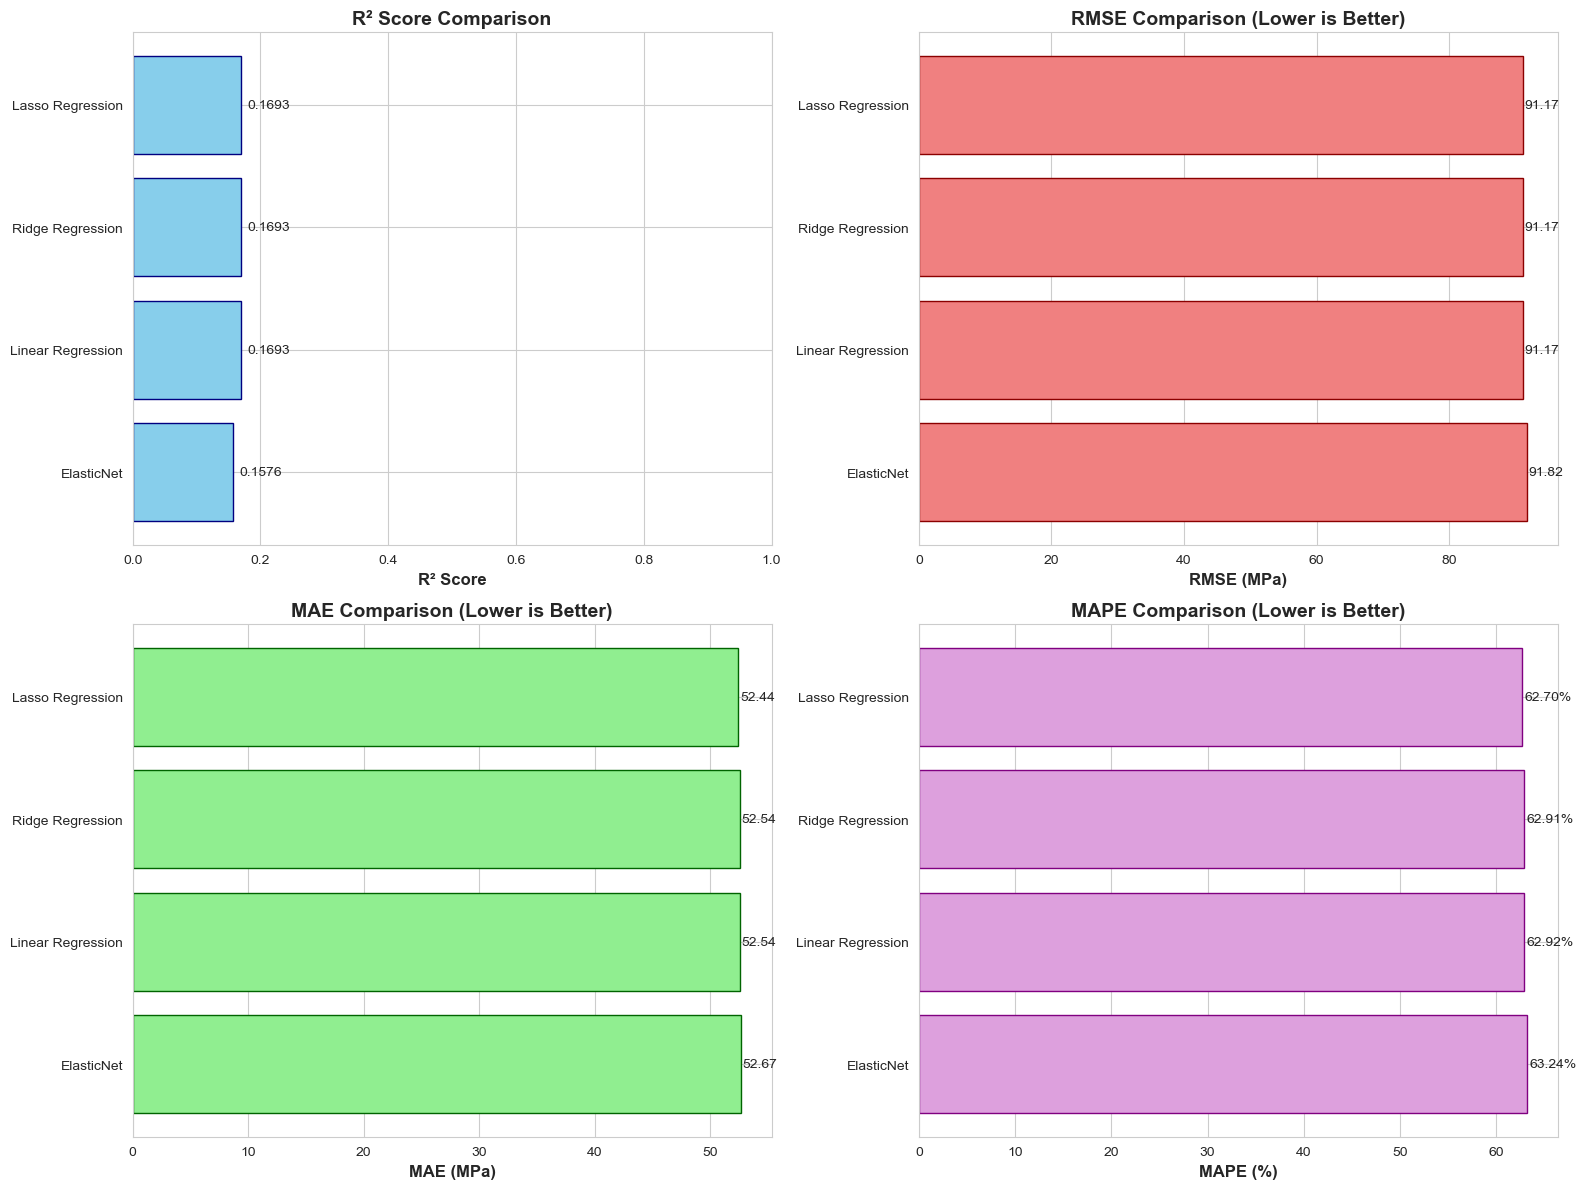

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
sorted_r2 = results_df.sort_values('R²')
bars1 = ax1.barh(sorted_r2['Model'], sorted_r2['R²'], color='skyblue', edgecolor='navy')
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('R² Score Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)

ax2 = axes[0, 1]
sorted_rmse = results_df.sort_values('RMSE', ascending=False)
bars2 = ax2.barh(sorted_rmse['Model'], sorted_rmse['RMSE'], color='lightcoral', edgecolor='darkred')
ax2.set_xlabel('RMSE (MPa)', fontsize=12, fontweight='bold')
ax2.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=10)

ax3 = axes[1, 0]
sorted_mae = results_df.sort_values('MAE', ascending=False)
bars3 = ax3.barh(sorted_mae['Model'], sorted_mae['MAE'], color='lightgreen', edgecolor='darkgreen')
ax3.set_xlabel('MAE (MPa)', fontsize=12, fontweight='bold')
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 0.15, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', ha='left', va='center', fontsize=10)

ax4 = axes[1, 1]
sorted_mape = results_df.sort_values('MAPE (%)', ascending=False)
bars4 = ax4.barh(sorted_mape['Model'], sorted_mape['MAPE (%)'], color='plum', edgecolor='purple')
ax4.set_xlabel('MAPE (%)', fontsize=12, fontweight='bold')
ax4.set_title('MAPE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

best_model_name = results_df.iloc[0]['Model']

## 6. Predicted vs Actual Values Visualization

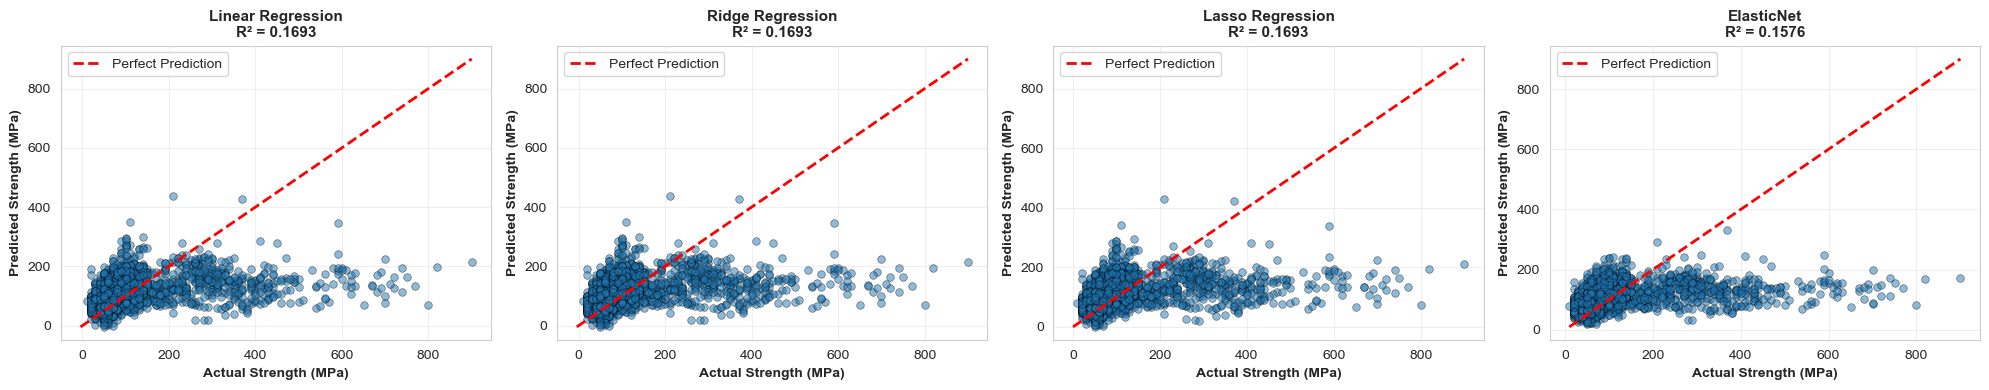

In [6]:
# Predicted vs Actual plots (dynamic layout matching number of models)
n = len(predictions)
if n == 0:
    print("No model predictions available to plot.")
else:
    ncols = min(4, n)
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))

    # Normalize axes to a flat array for easy indexing
    if isinstance(axes, np.ndarray):
        axes_flat = axes.flatten()
    else:
        axes_flat = np.array([axes])

    idx = -1
    for idx, (name, y_pred) in enumerate(predictions.items()):
        ax = axes_flat[idx]
        ax.scatter(y_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)

        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

        ax.set_xlabel('Actual Strength (MPa)', fontsize=10, fontweight='bold')
        ax.set_ylabel('Predicted Strength (MPa)', fontsize=10, fontweight='bold')
        ax.set_title(f'{name}\nR² = {results_df[results_df["Model"]==name]["R²"].values[0]:.4f}', 
                     fontsize=11, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Remove any unused subplots
    for extra_ax in axes_flat[idx+1:]:
        fig.delaxes(extra_ax)

    plt.tight_layout()
    plt.show()

## 7. Residual Analysis

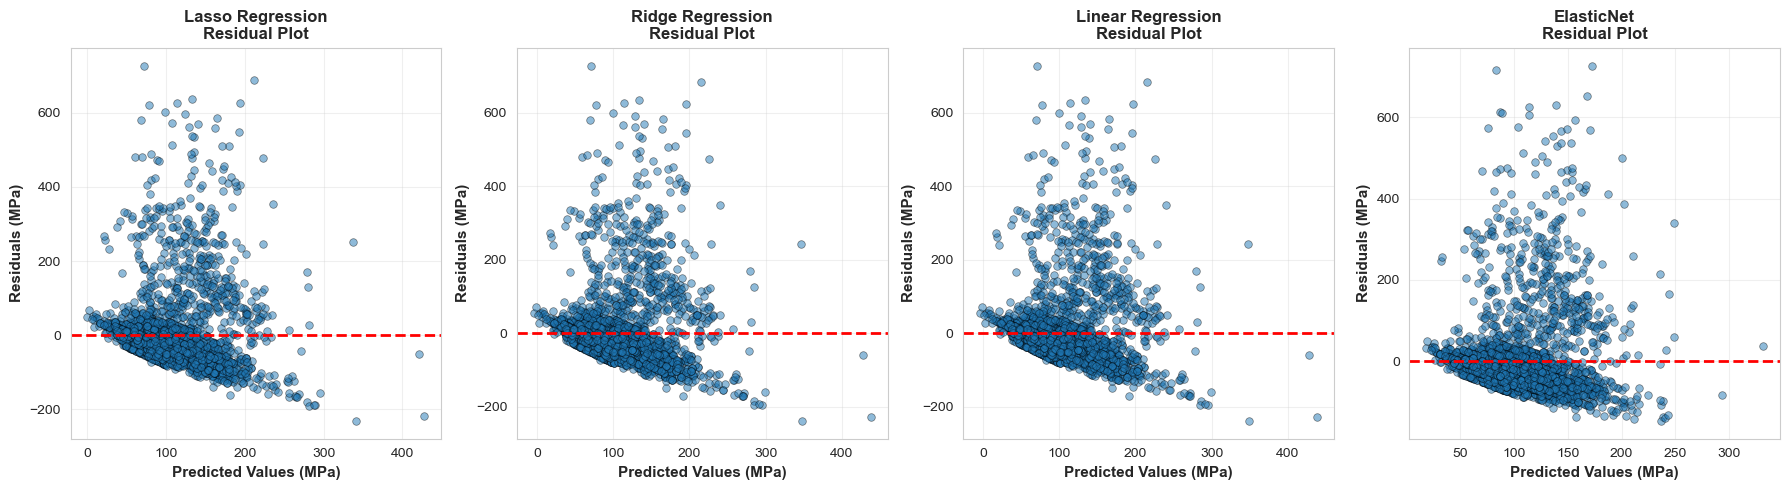

In [7]:
top_models = results_df.head(4)['Model'].tolist()
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for idx, model_name in enumerate(top_models):
    ax = axes[idx]
    y_pred = predictions[model_name]
    residuals = y_test - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Values (MPa)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Residuals (MPa)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nResidual Plot', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Coefficients Analysis (for Linear Models)

COEFFICIENTS FOR LINEAR MODELS (Standardized)
              Linear Regression  Ridge Regression  Lasso Regression  ElasticNet
lights                15.369011         15.375192         15.426681   16.161281
T1                     0.125611          0.014890         -1.120552   -7.208591
RH_1                  62.942256         62.823689         60.903553   32.586280
T2                   -38.649750        -38.409703        -33.572688   -0.410520
RH_2                 -55.395265        -55.188704        -50.888305  -16.871050
T3                    51.933219         51.901353         49.893004   32.123200
RH_3                  14.559412         14.537939         12.688462   10.901291
T4                    -7.961207         -7.976306         -7.618978   -9.389665
RH_4                  -1.765503         -1.769091         -0.271621   -1.286740
T5                    -1.604968         -1.658594         -3.061359   -6.992280
RH_5                   1.914604          1.916703          1.837914    1.4

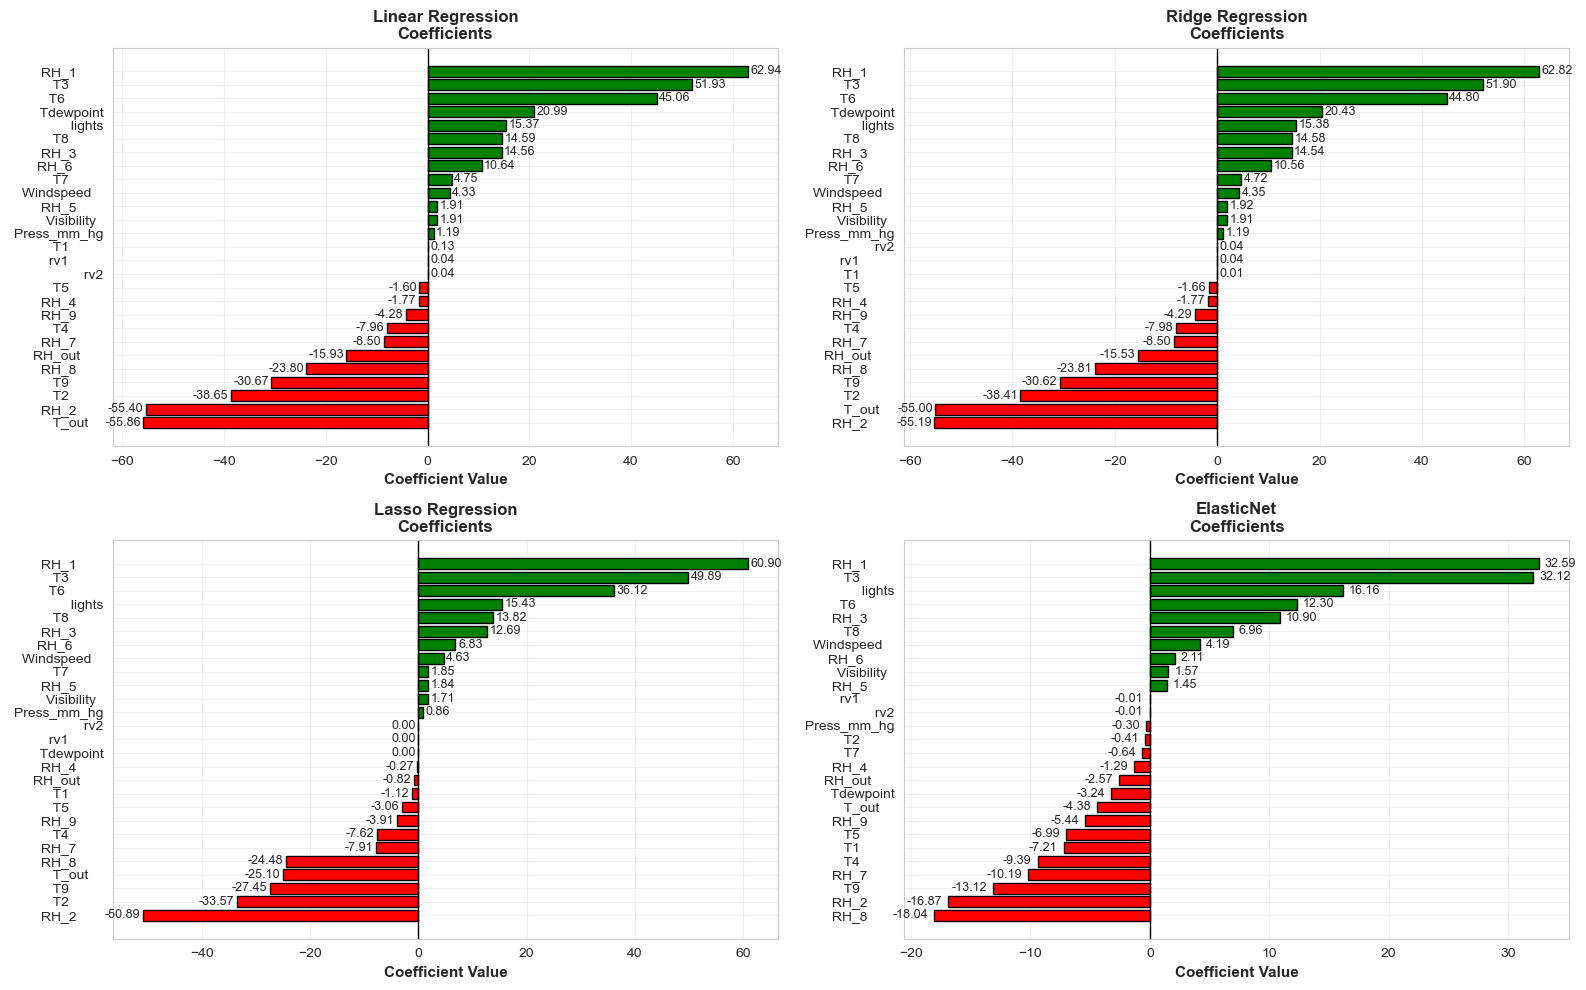

In [8]:
linear_models_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']

coef_data = []
for model_name in linear_models_list:
    model = trained_models[model_name]
    coef_data.append(model.coef_)

coef_df = pd.DataFrame(coef_data, columns=X.columns, index=linear_models_list)

print("=" * 100)
print("COEFFICIENTS FOR LINEAR MODELS (Standardized)")
print("=" * 100)
print(coef_df.T.to_string())
print("=" * 100)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, model_name in enumerate(linear_models_list):
    ax = axes[idx]
    coefs = coef_df.loc[model_name].sort_values()
    colors = ['red' if x < 0 else 'green' for x in coefs]
    
    bars = ax.barh(coefs.index, coefs.values, color=colors, edgecolor='black')
    ax.set_xlabel('Coefficient Value', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nCoefficients', fontsize=12, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        offset = 0.5 if width > 0 else -0.5
        ax.text(width + offset, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left' if width > 0 else 'right', 
                va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 10. Interpretation of Results

### 10.1 Model Performance Comparison

In [9]:
print("=" * 100)
print("COMPREHENSIVE MODEL INTERPRETATION")
print("=" * 100)

best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

print("\nPERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_df.iterrows():
    print(f"{i+1}. {row['Model']:<25} | R²: {row['R²']:.4f} | RMSE: {row['RMSE']:.3f} | MAE: {row['MAE']:.3f}")

print("\n\nBEST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {best_model['Model']}")
print(f"  • R² Score: {best_model['R²']:.4f}")
print(f"    → Explains {best_model['R²']*100:.2f}% of variance in concrete strength")
print(f"  • RMSE: {best_model['RMSE']:.3f} MPa")
print(f"    → Average prediction error magnitude")
print(f"  • MAE: {best_model['MAE']:.3f} MPa")
print(f"    → Average absolute prediction error")
print(f"  • MAPE: {best_model['MAPE (%)']:.2f}%")
print(f"    → Average percentage error in predictions")

print("\n\nWORST MODEL ANALYSIS:")
print("-" * 100)
print(f"Model: {worst_model['Model']}")
print(f"  • R² Score: {worst_model['R²']:.4f}")
print(f"    → Explains only {worst_model['R²']*100:.2f}% of variance")
print(f"  • RMSE: {worst_model['RMSE']:.3f} MPa")
print(f"  • MAE: {worst_model['MAE']:.3f} MPa")

# Model category comparison (linear-only)
print("\n\nMODEL TYPE COMPARISON:")
print("-" * 100)
linear_avg_r2 = results_df[results_df['Model'].isin(linear_models_list)]['R²'].mean()

print(f"Linear Models Average R²: {linear_avg_r2:.4f}")
print("\n✓ Note: Non-linear/tree-based models removed — analysis focuses on linear models and their coefficients.")

print("\n" + "=" * 100)

COMPREHENSIVE MODEL INTERPRETATION

PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
1. Lasso Regression          | R²: 0.1693 | RMSE: 91.172 | MAE: 52.436
2. Ridge Regression          | R²: 0.1693 | RMSE: 91.173 | MAE: 52.540
3. Linear Regression         | R²: 0.1693 | RMSE: 91.174 | MAE: 52.545
4. ElasticNet                | R²: 0.1576 | RMSE: 91.816 | MAE: 52.675


BEST MODEL ANALYSIS:
----------------------------------------------------------------------------------------------------
Model: Lasso Regression
  • R² Score: 0.1693
    → Explains 16.93% of variance in concrete strength
  • RMSE: 91.172 MPa
    → Average prediction error magnitude
  • MAE: 52.436 MPa
    → Average absolute prediction error
  • MAPE: 62.70%
    → Average percentage error in predictions


WORST MODEL ANALYSIS:
----------------------------------------------------------------------------------------------------
Model: ElasticNet
  • R²

### 10.2 Coefficient and Feature Importance Interpretation

In [10]:
print("=" * 100)
print("FEATURE IMPACT INTERPRETATION")
print("=" * 100)

lr_model = trained_models['Linear Regression']
lr_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nLINEAR REGRESSION COEFFICIENTS INTERPRETATION:")
print("-" * 100)

for _, row in lr_coefs.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "INCREASES" if coef > 0 else "DECREASES"
    
    print(f"{feature}:")
    print(f"  Coefficient: {coef:+.4f}")
    print(f"  One standard deviation increase in {feature} {direction} strength by {abs(coef):.4f} std units")
    print()

print("\n\nKEY INSIGHTS FROM COEFFICIENT ANALYSIS:")
print("-" * 100)

# Top features by absolute coefficient magnitude (linear models)
top_3_features = lr_coefs.reindex(lr_coefs['Coefficient'].abs().sort_values(ascending=False).index).head(3)['Feature'].tolist()
print(f"Top 3 Most Important Features (by coefficient magnitude): {', '.join(top_3_features)}")

positive_coefs = lr_coefs[lr_coefs['Coefficient'] > 0]
negative_coefs = lr_coefs[lr_coefs['Coefficient'] < 0]

print(f"\nFeatures with POSITIVE impact on strength ({len(positive_coefs)}):")
for _, row in positive_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print(f"\nFeatures with NEGATIVE impact on strength ({len(negative_coefs)}):")
for _, row in negative_coefs.iterrows():
    print(f"  {row['Feature']} ({row['Coefficient']:+.4f})")

print("\n" + "=" * 100)

FEATURE IMPACT INTERPRETATION

LINEAR REGRESSION COEFFICIENTS INTERPRETATION:
----------------------------------------------------------------------------------------------------
 RH_1       :
  Coefficient: +62.9423
  One standard deviation increase in  RH_1        INCREASES strength by 62.9423 std units

 T3         :
  Coefficient: +51.9332
  One standard deviation increase in  T3          INCREASES strength by 51.9332 std units

 T6          :
  Coefficient: +45.0564
  One standard deviation increase in  T6           INCREASES strength by 45.0564 std units

 Tdewpoint:
  Coefficient: +20.9875
  One standard deviation increase in  Tdewpoint INCREASES strength by 20.9875 std units

 lights:
  Coefficient: +15.3690
  One standard deviation increase in  lights INCREASES strength by 15.3690 std units

 T8         :
  Coefficient: +14.5944
  One standard deviation increase in  T8          INCREASES strength by 14.5944 std units

 RH_3       :
  Coefficient: +14.5594
  One standard deviat

### 10.3 Model Quality Assessment

In [11]:
print("=" * 100)
print("MODEL QUALITY ASSESSMENT")
print("=" * 100)

for _, row in results_df.iterrows():
    model_name = row['Model']
    r2 = row['R²']
    rmse = row['RMSE']
    mape = row['MAPE (%)']
    
    print(f"\n{'='*50}")
    print(f"MODEL: {model_name}")
    print(f"{'='*50}")
    
    # R² interpretation
    print(f"\n1. R² Score: {r2:.4f}")
    if r2 >= 0.9:
        quality = "EXCELLENT"
        interpretation = "Model explains >90% of variance - very strong predictive power"
    elif r2 >= 0.8:
        quality = "GOOD"
        interpretation = "Model explains 80-90% of variance - strong predictive power"
    elif r2 >= 0.7:
        quality = "MODERATE"
        interpretation = "Model explains 70-80% of variance - acceptable predictive power"
    elif r2 >= 0.5:
        quality = "FAIR"
        interpretation = "Model explains 50-70% of variance - limited predictive power"
    else:
        quality = "POOR"
        interpretation = "Model explains <50% of variance - weak predictive power"
    
    print(f"   Quality: {quality}")
    print(f"   → {interpretation}")
    
    # RMSE interpretation
    print(f"\n2. RMSE: {rmse:.3f} MPa")
    avg_strength = y_test.mean()
    rmse_percentage = (rmse / avg_strength) * 100
    print(f"   → Average prediction error: {rmse:.3f} MPa ({rmse_percentage:.2f}% of mean strength)")
    
    if rmse_percentage < 10:
        print(f"   → Error is <10% of mean - HIGH PRECISION")
    elif rmse_percentage < 15:
        print(f"   → Error is 10-15% of mean - GOOD PRECISION")
    elif rmse_percentage < 20:
        print(f"   → Error is 15-20% of mean - MODERATE PRECISION")
    else:
        print(f"   → Error is >20% of mean - LOW PRECISION")
    
    # MAPE interpretation
    print(f"\n3. MAPE: {mape:.2f}%")
    if mape < 10:
        print(f"   → Highly accurate forecasting")
    elif mape < 20:
        print(f"   → Good forecasting")
    elif mape < 30:
        print(f"   → Reasonable forecasting")
    else:
        print(f"   → Inaccurate forecasting")

print("\n" + "=" * 100)

MODEL QUALITY ASSESSMENT

MODEL: Lasso Regression

1. R² Score: 0.1693
   Quality: POOR
   → Model explains <50% of variance - weak predictive power

2. RMSE: 91.172 MPa
   → Average prediction error: 91.172 MPa (94.31% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 62.70%
   → Inaccurate forecasting

MODEL: Ridge Regression

1. R² Score: 0.1693
   Quality: POOR
   → Model explains <50% of variance - weak predictive power

2. RMSE: 91.173 MPa
   → Average prediction error: 91.173 MPa (94.31% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 62.91%
   → Inaccurate forecasting

MODEL: Linear Regression

1. R² Score: 0.1693
   Quality: POOR
   → Model explains <50% of variance - weak predictive power

2. RMSE: 91.174 MPa
   → Average prediction error: 91.174 MPa (94.31% of mean strength)
   → Error is >20% of mean - LOW PRECISION

3. MAPE: 62.92%
   → Inaccurate forecasting

MODEL: ElasticNet

1. R² Score: 0.1576
   Quality: POOR
   → Model exp

## 11. Interactive Prediction Application

### 11.1 Setup Prediction Function

In [12]:
# Select the best model for the application
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

# Check if it's a linear model (needs scaling)
is_linear_model = best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']

print(f"🎯 Selected Model for Application: {best_model_name}")
print(f"   R² Score: {results_df.iloc[0]['R²']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['RMSE']:.3f}")
print(f"   MAE: {results_df.iloc[0]['MAE']:.3f}")
print(f"\n📊 Number of features: {X.shape[1]}")
print(f"   Feature names: {list(X.columns)}")

# Define generic prediction function - works with any number of features
def predict_value(*args):
    """
    Predict target based on input features (flexible for any dataset).
    
    Parameters:
    -----------
    *args: Feature values in the same order as X columns
    
    Returns:
    --------
    Predicted value
    """
    # Create input array with correct number of features
    input_data = np.array([list(args)])
    
    # Scale if needed
    if is_linear_model:
        input_data_scaled = scaler.transform(input_data)
        prediction = best_model.predict(input_data_scaled)[0]
    else:
        prediction = best_model.predict(input_data)[0]
    
    return prediction

# Test with first row of test set
print(f"\n✓ Test Prediction:")
test_sample = X_test.iloc[0].values
test_prediction = predict_value(*test_sample)
actual_value = y_test.iloc[0]

print(f"   Predicted value: {test_prediction:.4f}")
print(f"   Actual value: {actual_value:.4f}")
print(f"   Error: {abs(test_prediction - actual_value):.4f}")

🎯 Selected Model for Application: Lasso Regression
   R² Score: 0.1693
   RMSE: 91.172
   MAE: 52.436

📊 Number of features: 27
   Feature names: [' lights', ' T1         ', ' RH_1       ', ' T2         ', ' RH_2       ', ' T3         ', ' RH_3       ', ' T4         ', ' RH_4       ', ' T5         ', ' RH_5       ', ' T6          ', ' RH_6        ', ' T7         ', ' RH_7       ', ' T8         ', ' RH_8       ', ' T9         ', ' RH_9       ', ' T_out    ', ' Press_mm_hg', ' RH_out      ', ' Windspeed   ', ' Visibility  ', ' Tdewpoint', ' rv1         ', ' rv2']

✓ Test Prediction:
   Predicted value: 40.9835
   Actual value: 40.0000
   Error: 0.9835


### 11.2 Interactive Widget Interface (using ipywidgets)

In [13]:
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
except ImportError:
    import sys
    !{sys.executable} -m pip install ipywidgets
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output

In [14]:
print("=" * 100)
print("INTERACTIVE PREDICTION APPLICATION")
print("=" * 100)
print(f"Model: {best_model_name} | R² = {results_df.iloc[0]['R²']:.4f} | RMSE = {results_df.iloc[0]['RMSE']:.4f}")
print(f"Number of features: {X.shape[1]}")
print("=" * 100)

# Create sliders dynamically based on actual data
sliders = {}
for col in X.columns:
    min_val = X[col].min()
    max_val = X[col].max()
    mean_val = X[col].mean()
    step = (max_val - min_val) / 100
    
    sliders[col] = widgets.FloatSlider(
        value=mean_val,
        min=min_val,
        max=max_val,
        step=step,
        description=f'{col}:',
        style={'description_width': '150px'},
        layout=widgets.Layout(width='600px')
    )

# Output widget
output_widget = widgets.Output()

# Prediction button
predict_button = widgets.Button(
    description='Make Prediction',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px'),
    style={'font_weight': 'bold'}
)

# Reset button
reset_button = widgets.Button(
    description='Reset to Mean',
    button_style='warning',
    layout=widgets.Layout(width='200px', height='40px')
)

def on_predict_click(b):
    with output_widget:
        clear_output(wait=True)
        
        # Get all slider values
        input_values = [sliders[col].value for col in X.columns]
        
        # Make prediction
        prediction = predict_value(*input_values)
        
        # Display results
        print("=" * 80)
        print("PREDICTION RESULTS")
        print("=" * 80)
        print(f"\nPredicted Output: {prediction:.4f}\n")
        print("Input Values:")
        for col, val in zip(X.columns, input_values):
            print(f"   {col}: {val:.4f}")
        print("\n" + "=" * 80)

def on_reset_click(b):
    for col in X.columns:
        sliders[col].value = X[col].mean()
    with output_widget:
        clear_output()
        print("Reset to mean values.")

predict_button.on_click(on_predict_click)
reset_button.on_click(on_reset_click)

# Display all sliders
display(HTML("<h3>Input Features:</h3>"))
for col, slider in sliders.items():
    display(slider)
display(HTML("<br>"))
display(widgets.HBox([predict_button, reset_button]))
display(HTML("<br>"))
display(output_widget)

INTERACTIVE PREDICTION APPLICATION
Model: Lasso Regression | R² = 0.1693 | RMSE = 91.1724
Number of features: 27


FloatSlider(value=3.8018748416518875, description=' lights:', layout=Layout(width='600px'), max=70.0, step=0.7…

FloatSlider(value=21.68657138674588, description=' T1         :', layout=Layout(width='600px'), max=26.26, min…

FloatSlider(value=40.259739279775026, description=' RH_1       :', layout=Layout(width='600px'), max=63.36, mi…

FloatSlider(value=20.34121946383937, description=' T2         :', layout=Layout(width='600px'), max=29.8566666…

FloatSlider(value=40.42042041370864, description=' RH_2       :', layout=Layout(width='600px'), max=56.0266666…

FloatSlider(value=22.267610984879145, description=' T3         :', layout=Layout(width='600px'), max=29.236, m…

FloatSlider(value=39.24250007719837, description=' RH_3       :', layout=Layout(width='600px'), max=50.1633333…

FloatSlider(value=20.855334722420064, description=' T4         :', layout=Layout(width='600px'), max=26.2, min…

FloatSlider(value=39.02690378813732, description=' RH_4       :', layout=Layout(width='600px'), max=51.09, min…

FloatSlider(value=19.592106328022297, description=' T5         :', layout=Layout(width='600px'), max=25.795, m…

FloatSlider(value=50.94928262960324, description=' RH_5       :', layout=Layout(width='600px'), max=96.3216666…

FloatSlider(value=7.910939332397315, description=' T6          :', layout=Layout(width='600px'), max=28.29, mi…

FloatSlider(value=54.60908338757447, description=' RH_6        :', layout=Layout(width='600px'), max=99.9, min…

FloatSlider(value=20.267106470149987, description=' T7         :', layout=Layout(width='600px'), max=26.0, min…

FloatSlider(value=35.38820021508133, description=' RH_7       :', layout=Layout(width='600px'), max=51.4, min=…

FloatSlider(value=22.029106722980494, description=' T8         :', layout=Layout(width='600px'), max=27.23, mi…

FloatSlider(value=42.93616537239119, description=' RH_8       :', layout=Layout(width='600px'), max=58.78, min…

FloatSlider(value=19.48582816060552, description=' T9         :', layout=Layout(width='600px'), max=24.5, min=…

FloatSlider(value=41.55240075337167, description=' RH_9       :', layout=Layout(width='600px'), max=53.3266666…

FloatSlider(value=7.412579538890296, description=' T_out    :', layout=Layout(width='600px'), max=26.1, min=-5…

FloatSlider(value=755.5226019761844, description=' Press_mm_hg:', layout=Layout(width='600px'), max=772.3, min…

FloatSlider(value=79.75041803901698, description=' RH_out      :', layout=Layout(width='600px'), min=24.0, ste…

FloatSlider(value=4.0397517101596145, description=' Windspeed   :', layout=Layout(width='600px'), max=14.0, st…

FloatSlider(value=38.33083354446369, description=' Visibility  :', layout=Layout(width='600px'), max=66.0, min…

FloatSlider(value=3.760994689637699, description=' Tdewpoint:', layout=Layout(width='600px'), max=15.5, min=-6…

FloatSlider(value=24.988033485046117, description=' rv1         :', layout=Layout(width='600px'), max=49.99652…

FloatSlider(value=24.988033485046117, description=' rv2:', layout=Layout(width='600px'), max=49.99652968, min=…

Output()

### 11.3 Feature Sensitivity Analysis Dashboard

In [15]:
print("=" * 100)
print("FEATURE SENSITIVITY ANALYSIS")
print("=" * 100)

# Dropdown to select feature
feature_dropdown = widgets.Dropdown(
    options=list(X.columns),
    value=X.columns[0],
    description='Select Feature:',
    style={'description_width': '120px'}
)

# Output for sensitivity plot
sensitivity_output = widgets.Output()

def analyze_sensitivity(feature_name):
    with sensitivity_output:
        clear_output(wait=True)
        
        # Base values (mean from training data)
        base_values = X.mean().to_dict()
        
        # Get range for selected feature
        min_val = X[feature_name].min()
        max_val = X[feature_name].max()
        feature_range = np.linspace(min_val, max_val, 50)
        
        predictions = []
        
        # Vary selected feature while keeping others at mean
        for value in feature_range:
            input_vals = base_values.copy()
            input_vals[feature_name] = value
            
            pred = predict_value(*[input_vals[col] for col in X.columns])
            predictions.append(pred)
        
        # Plot
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(feature_range, predictions, linewidth=3, color='darkblue', marker='o', markersize=4)
        ax.set_xlabel(f'{feature_name}', fontsize=13, fontweight='bold')
        ax.set_ylabel('Predicted Output', fontsize=13, fontweight='bold')
        ax.set_title(f'Sensitivity Analysis: Impact of {feature_name}', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add baseline marker
        base_pred = predictions[len(predictions)//2]
        ax.axhline(y=base_pred, color='red', linestyle='--', alpha=0.5, 
                  label=f'Baseline: {base_pred:.4f}')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nSensitivity Statistics for {feature_name}:")
        print(f"   Min Predicted Value: {min(predictions):.4f}")
        print(f"   Max Predicted Value: {max(predictions):.4f}")
        print(f"   Range of Impact: {max(predictions) - min(predictions):.4f}")
        print(f"   Baseline Value: {base_pred:.4f}")
        
        if predictions[-1] > predictions[0]:
            trend = "INCREASES"
        else:
            trend = "DECREASES"
        
        print(f"\nTrend: Output {trend} as {feature_name} increases")

def on_feature_change(change):
    analyze_sensitivity(change['new'])

feature_dropdown.observe(on_feature_change, names='value')

display(HTML("<h3>Interactive Sensitivity Analysis:</h3>"))
display(HTML("<p>Select a feature to see how it affects the prediction</p>"))
display(feature_dropdown)
display(sensitivity_output)

analyze_sensitivity(X.columns[0])

FEATURE SENSITIVITY ANALYSIS


Dropdown(description='Select Feature:', options=(' lights', ' T1         ', ' RH_1       ', ' T2         ', ' …

Output()

### 11.4 Model Performance Dashboard

MODEL PERFORMANCE DASHBOARD


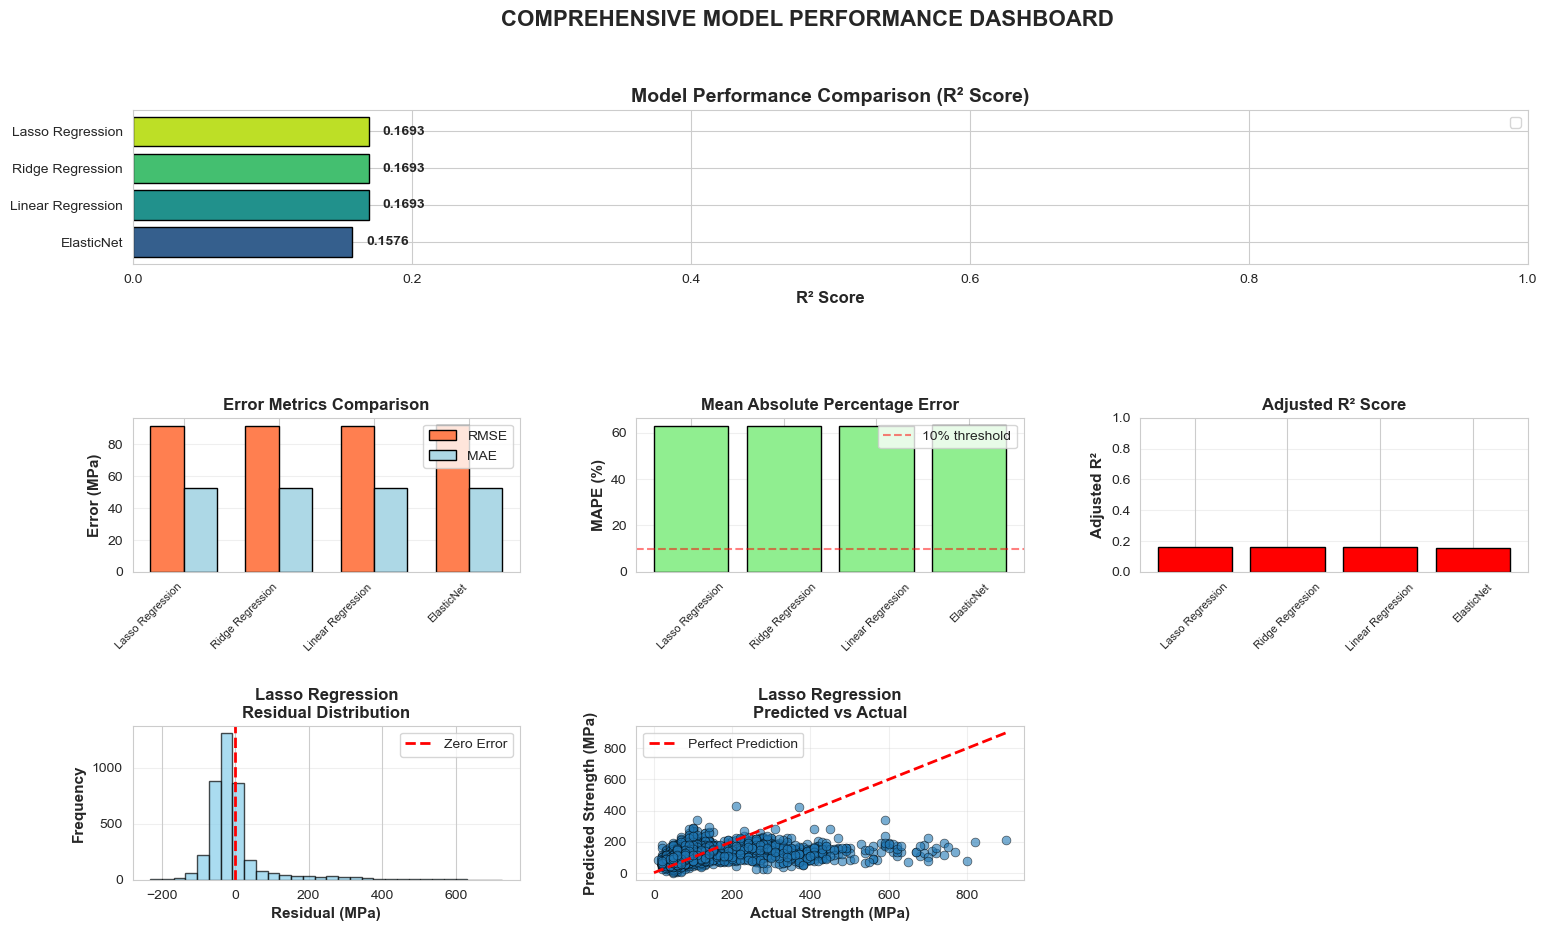


Recommended Model for Production: Lasso Regression


In [16]:
print("=" * 100)
print("MODEL PERFORMANCE DASHBOARD")
print("=" * 100)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=1.0, wspace=0.3)

# 1. Model Comparison - R² Score
ax1 = fig.add_subplot(gs[0, :])
sorted_models = results_df.sort_values('R²', ascending=True)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_models)))
bars = ax1.barh(sorted_models['Model'], sorted_models['R²'], color=colors_gradient, edgecolor='black')
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison (R² Score)', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.legend()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

# 2. Error Distribution - RMSE and MAE
ax2 = fig.add_subplot(gs[1, 0])
x_pos = np.arange(len(results_df))
width = 0.35
ax2.bar(x_pos - width/2, results_df['RMSE'], width, label='RMSE', color='coral', edgecolor='black')
ax2.bar(x_pos + width/2, results_df['MAE'], width, label='MAE', color='lightblue', edgecolor='black')
ax2.set_ylabel('Error (MPa)', fontsize=11, fontweight='bold')
ax2.set_title('Error Metrics Comparison', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. MAPE Distribution
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(results_df['Model'], results_df['MAPE (%)'], color='lightgreen', edgecolor='black')
ax3.set_ylabel('MAPE (%)', fontsize=11, fontweight='bold')
ax3.set_title('Mean Absolute Percentage Error', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45, labelsize=8)
ax3.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Adjusted R²
ax4 = fig.add_subplot(gs[1, 2])
colors_r2 = ['green' if x >= 0.8 else 'orange' if x >= 0.6 else 'red' 
             for x in results_df['Adjusted R²']]
ax4.bar(results_df['Model'], results_df['Adjusted R²'], color=colors_r2, edgecolor='black')
ax4.set_ylabel('Adjusted R²', fontsize=11, fontweight='bold')
ax4.set_title('Adjusted R² Score', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=45, labelsize=8)
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)

# 5. Best Model Prediction Distribution
ax5 = fig.add_subplot(gs[2, 0])
best_pred = predictions[best_model_name]
residuals_best = y_test - best_pred
ax5.hist(residuals_best, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax5.set_xlabel('Residual (MPa)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title(f'{best_model_name}\nResidual Distribution', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Prediction Accuracy
ax6 = fig.add_subplot(gs[2, 1])
best_pred = predictions[best_model_name]
ax6.scatter(y_test, best_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=40)
min_val = min(y_test.min(), best_pred.min())
max_val = max(y_test.max(), best_pred.max())
ax6.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax6.set_xlabel('Actual Strength (MPa)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Predicted Strength (MPa)', fontsize=11, fontweight='bold')
ax6.set_title(f'{best_model_name}\nPredicted vs Actual', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)


plt.suptitle('COMPREHENSIVE MODEL PERFORMANCE DASHBOARD', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

print(f"\nRecommended Model for Production: {best_model_name}")

## 12. Summary and Conclusions

In [17]:
print("=" * 100)
print("PROJECT SUMMARY AND CONCLUSIONS")
print("=" * 100)

print("\nPROJECT OVERVIEW:")
print("-" * 100)
print(f"• Dataset: {csv_filename}")
print(f"• Total Samples: {len(df)}")
print(f"• Features: {X.shape[1]}")
print(f"• Target Variable: {target_col}")
print(f"• Models Evaluated: {len(models)}")

print("\n\nMODEL PERFORMANCE RANKING:")
print("-" * 100)
for i, row in results_df.iterrows():
    print(f"{i+1}. {row['Model']:<25} | R²: {row['R²']:.4f} | RMSE: {row['RMSE']:.4f} | MAE: {row['MAE']:.4f}")

print("\n\nKEY FINDINGS:")
print("-" * 100)

best = results_df.iloc[0]
worst = results_df.iloc[-1]

print(f"\n1. BEST PERFORMING MODEL:")
print(f"   Model: {best['Model']}")
print(f"   R² Score: {best['R²']:.4f}")
print(f"   RMSE: {best['RMSE']:.4f}")
print(f"   MAE: {best['MAE']:.4f}")

print(f"\n2. WORST PERFORMING MODEL:")
print(f"   Model: {worst['Model']}")
print(f"   R² Score: {worst['R²']:.4f}")
print(f"   RMSE: {worst['RMSE']:.4f}")

print(f"\n3. MODEL TYPE COMPARISON:")
linear_r2 = results_df[results_df['Model'].isin(['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet'])]['R²'].mean()
print(f"   Linear Models Average R²: {linear_r2:.4f}")

print(f"\n4. FEATURE IMPORTANCE (TOP COEFFICIENTS):")
coefs = trained_models['Linear Regression'].coef_
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs,
    'Abs_Coef': np.abs(coefs)
}).sort_values('Abs_Coef', ascending=False)

print(f"   Top 3 Most Important Features:")
for idx, (_, row) in enumerate(coef_df.head(3).iterrows(), 1):
    print(f"      {idx}. {row['Feature']}: {row['Coefficient']:+.4f}")

print(f"\n5. MODEL RELIABILITY:")
print(f"   RMSE: {best['RMSE']:.4f}")
print(f"   MAE: {best['MAE']:.4f}")
print(f"   MAPE: {best['MAPE (%)']:.2f}%")
avg_target = y_test.mean()
rmse_percentage = (best['RMSE'] / avg_target) * 100
print(f"   RMSE as % of mean: {rmse_percentage:.2f}%")

print(f"\n6. FEATURE CORRELATIONS WITH TARGET:")
correlations = df.corr()[target_col].sort_values(ascending=False)
print("   Top 5 correlated features:")
for feature, corr in correlations.items():
    if feature != target_col:
        print(f"      {feature}: {corr:+.4f}")
        if len(correlations) - correlations.tolist().index(corr) >= len(correlations) - 5:
            break

print("\n" + "=" * 100)

PROJECT SUMMARY AND CONCLUSIONS

PROJECT OVERVIEW:
----------------------------------------------------------------------------------------------------
• Dataset: ../data_set/energydata_complete.csv
• Total Samples: 19735
• Features: 27
• Target Variable:  Appliances
• Models Evaluated: 4


MODEL PERFORMANCE RANKING:
----------------------------------------------------------------------------------------------------
1. Lasso Regression          | R²: 0.1693 | RMSE: 91.1724 | MAE: 52.4361
2. Ridge Regression          | R²: 0.1693 | RMSE: 91.1731 | MAE: 52.5397
3. Linear Regression         | R²: 0.1693 | RMSE: 91.1743 | MAE: 52.5447
4. ElasticNet                | R²: 0.1576 | RMSE: 91.8157 | MAE: 52.6748


KEY FINDINGS:
----------------------------------------------------------------------------------------------------

1. BEST PERFORMING MODEL:
   Model: Lasso Regression
   R² Score: 0.1693
   RMSE: 91.1724
   MAE: 52.4361

2. WORST PERFORMING MODEL:
   Model: ElasticNet
   R² Score: 0.